# Numerical diffusion
Numerical diffusion is a common problem with advection of field data on an Eulerian particle grid (one that is fixed in space).
The code below can be used to demonstrate numerical diffusion.

## Getting started
Here we consider advection of a rock mass with density $\rho$.

$$\frac{\partial \rho}{\partial t} = -v_{x} \left( \frac{\partial \rho}{\partial x} \right)$$

where $x$ is the spatial coordinate and $t$ is time.

The upwind finite-difference solution to this advection equation is

$$ \rho_{n}^{i} = \rho_{n}^{i-1} -v_{x} \Delta t \frac{\rho_{n}^{i-1} - \rho_{n-1}^{i-1}}{\Delta x}.$$

The code below calculates this finite-difference solution and produces a plot of the output.

## Setting up the problem
First we can import the necessary modules and configure the problem geometry. 
We start by setting the spatial scale `xmax`, number of grid points `nx`, advection velocity `vx`, and time step `dt`. Then we can create the spatial coordinate (`x`) and density (`density`, `densitynew`) arrays.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,6]

xmax = 0.25                      # Length scale of problem
nx = 30                          # Number of points to consider along x axis
vx = 1.0                         # Advection velocity
dt = 0.001                       # Time step
nsteps = 21                      # Number of time steps

x = np.linspace(0.0, xmax, nx)   # Spatial array
dx = x[1] - x[0]                 # Grid spacing
density = np.zeros(nx) + 3200    # Density array 1
densitynew = np.copy(density)    # Density array 2

# We initialize the density to 3300 between x = 0.05 and x = 0.10
density[(x >= 0.05) & (x <= 0.10)] = 3300

## Calculating the solution and plotting the results
Now we can calculate the finite difference solution and plot the results. Note that we plot only every 5th time step for the output. Note that if you make changes to the geometry of the problem (cell above) you will need to run both that cell and the one below to create a new plot.

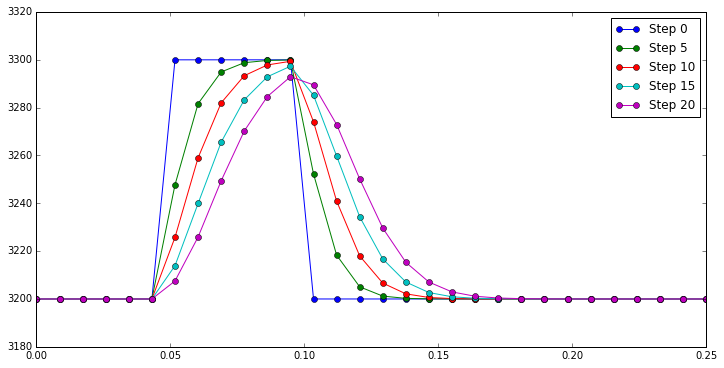

In [11]:
for t in range(nsteps):
    for i in range(1, len(density)-1):
        densitynew[i] = density[i] - vx * dt * (density[i] - density[i-1]) / dx
    # Plot every 5th time step
    if t%5 == 0:
        plt.plot(x, density, '-o', label="Step {0:d}".format(t))
    density = densitynew

#plt.plot(x, densityOrig)
plt.ylim([3180, 3320])
plt.legend()

## What to do?
Feel free to play with the time step, number of time steps, advection velocity, etc.
You should find that numerical diffusion is problematic no matter what you do (other than `vx = 0`).